There are 4 CPUs on this machine


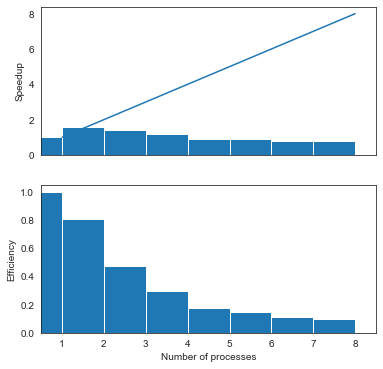

In [1]:
import multiprocessing  # the module we will be using for multiprocessing
import numpy as np
import pandas as pd
import time
from itertools import repeat
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

#Here we import our own module where implements the function work, which will be executed in 
#each one of the parallel threads
import myfunctions as my


#This function is now defined in the module myfunctions
# def work(task):
#    """
#    Some amount of work that will take time
#    
#    Parameters
#    ----------
#    task : tuple
#        Contains number, loop, and number processors
#    """
#    number, loop = task
#    b = 2. * number - 1.
#    for i in range(loop):
#        a, b = b * i, number * i + b
#    return a, b

def plot(multip_stats):
    """
    plots times from multiprocessing
    
    Parameters
    ----------
    multip_stats : dictionary
        dictionary containing time running
    """
    serial_time = multip_stats[1].mean()
    keys = sorted(multip_stats.keys())
    keys = np.array(keys)
    speedup = []
    efficiency = []
    for number_processes in keys:
        speedup.append(serial_time / multip_stats[number_processes].mean())
        efficiency.append(speedup[-1] / number_processes)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(211)
    plt.plot(keys, keys)
    plt.bar(keys-0.5, speedup, width=1)
    plt.ylabel('Speedup')
    ax.set_xticks(range(1, keys[-1] + 1))
    ax.set_xticklabels([])
    plt.xlim(0.5, keys[-1] + .5)
    
    ax = fig.add_subplot(212)
    plt.bar(keys-0.5, efficiency, width=1)
    plt.ylabel('Efficiency')
    plt.xlabel('Number of processes')
    ax.set_xticks(range(1, keys[-1] + 1))
    ax.set_xticklabels(range(1, keys[-1] + 1))
    plt.xlim(0.5, keys[-1] + .5)
    plt.savefig("./parallel_speedup_efficiency.png")

if __name__ == "__main__":
    cpu_count = multiprocessing.cpu_count()
    print("There are %d CPUs on this machine" % cpu_count)
    number_processes = range(1, cpu_count * 2 + 1)
    loop = 1000
    total_tasks = 1000
    tasks = np.float_(range(1, total_tasks))
    number_of_times_to_repeat = 20
    multip_stats = {}
    for number in number_processes:
        multip_stats[number] = np.empty(number_of_times_to_repeat)
        for i in range(number_of_times_to_repeat):
            pool = multiprocessing.Pool(number)
            start_time = time.time()
            results = pool.map_async(my.work, zip(tasks, repeat(loop))) 
            pool.close()
            pool.join()
            end_time = time.time()
            multip_stats[number][i] = end_time - start_time
    plot(multip_stats)